# Continuous Probability Distribution Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# TASK 1

In [3]:
mean=1332
std=725

1: What proportion of tax returns are greater than $2,000?

In [17]:
x=2000
z=(x-mean)/std
p=st.norm.cdf(z)
print('Proportion of tax returns are greater than $2,000 is ',round(1-p,3))

Proportion of tax returns are greater than $2,000 is  0.178


2: What proportion of tax indicates that a taxpayer owes money to the government?

In [16]:
x=0
z=(x-mean)/std
p=st.norm.cdf(z)
print('Proportion of tax indicates that a taxpayer owes money to the government ',round(p,3))

Proportion of tax indicates that a taxpayer owes money to the government  0.033


3: What proportion of tax returns indicates a refund between $100 and $700?



In [23]:
x1=100
z1=(x1-mean)/std
x2=700
z2=(x2-mean)/std
p=st.norm.cdf(z2)-st.norm.cdf(z1)
print('proportion of tax returns indicates a refund between $100 and $700 : ',round(p,3) )

proportion of tax returns indicates a refund between $100 and $700 :  0.147


# Task 2

In [7]:
df=pd.read_csv('DS1_C5_S5_Computers_Data_Challenge.csv')

In [8]:
df.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

1:Extract sample data using an appropriate sampling technique. (Make sure that the sample has a minimum size of 50, contain device screen size data, and the computer price does not exceed $4,000.)

In [9]:
sam_100=df.where(df['price']<=4000).sample(100,random_state=2,ignore_index=True)
sam_100

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,16.0,2225.0,50.0,130.0,4.0,14.0,no,no,yes,94.0,1.0
1,2416.0,2643.0,66.0,212.0,4.0,14.0,yes,no,no,216.0,13.0
2,2962.0,3089.0,66.0,424.0,8.0,14.0,no,no,no,267.0,15.0
3,104.0,2999.0,66.0,330.0,4.0,15.0,no,no,yes,95.0,2.0
4,2835.0,2495.0,66.0,424.0,8.0,15.0,yes,no,yes,267.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
95,5958.0,1199.0,50.0,545.0,4.0,14.0,no,no,yes,129.0,29.0
96,6113.0,1994.0,100.0,850.0,8.0,14.0,yes,no,yes,51.0,32.0
97,3849.0,1495.0,33.0,214.0,4.0,14.0,no,no,yes,273.0,18.0
98,5096.0,2195.0,33.0,720.0,16.0,15.0,yes,no,yes,182.0,24.0


Task 2 : Calculate the central tendency and dispersion for the sample and population data to check if they are equal and justify that the samples follow the central limit theorem.

In [25]:
# Central Tendancy

data=pd.DataFrame()
data['Measures']=['Mean','Median']
data['Population']=[round(df['price'].mean(),2),round(df['price'].std(),2)]
data['Sample']=[round(sam_100['price'].mean(),2),round(sam_100['price'].std(),2)]
data

,Measures,Population,Sample
0,Mean,2219.58,2199.38
1,Median,580.80,569.33


In [24]:
Pop_std=df['price'].std()
Pop_var=pow(Pop_std,0.5)
Pop_skew=st.skew(df['price'])
Pop_kur=st.kurtosis(df['price'],fisher=False)

In [27]:
Sam_std=sam_100['price'].std()
Sam_var=pow(Sam_std,0.5)
Sam_skew=st.skew(sam_100['price'])
Sam_kur=st.kurtosis(sam_100['price'],fisher=False)

In [28]:
# Dispersion

data=pd.DataFrame()
data['Measures']=['Standard Deviation','Variance','Skewness','Kurtosis']
data['Population']=[Pop_std,Pop_var,Pop_skew,Pop_kur]
data['Sample']=[Sam_std,Sam_var,Sam_skew,Sam_kur]
data

,Measures,Population,Sample
0,Standard Deviation,580.803956,569.326268
1,Variance,24.099875,23.860559
2,Skewness,0.711554,0.467214
3,Kurtosis,3.728875,2.842529


3 : Draw the normal distribution plot of the population.

In [29]:
mean=df['price'].mean()
std=df['price'].std()
lower=mean-3*std
upper=mean+3*std
data=np.arange(lower,upper,0.1)
norm_prob=st.norm.pdf(data,loc=mean,scale=std)

Text(0.5, 1.0, 'Normal Distribution Plot Of Population')

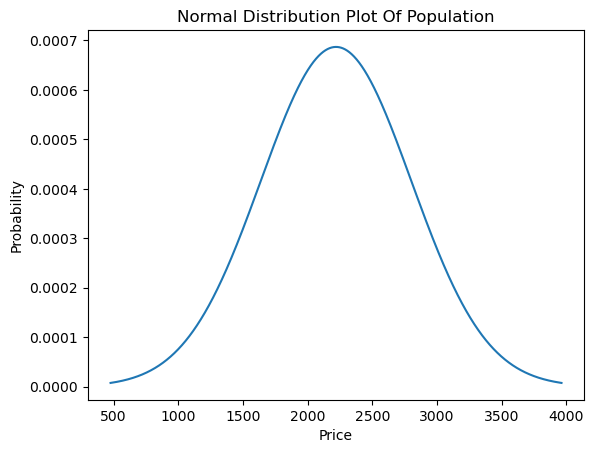

In [32]:
plt.plot(data,norm_prob,)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Normal Distribution Plot Of Population')

4 : Draw the normal distribution plot of the sample.

In [33]:
mean=sam_100['price'].mean()
std=sam_100['price'].std()
lower=mean-3*std
upper=mean+3*std
data=np.arange(lower,upper,0.1)
norm_prob=st.norm.pdf(data,loc=mean,scale=std)

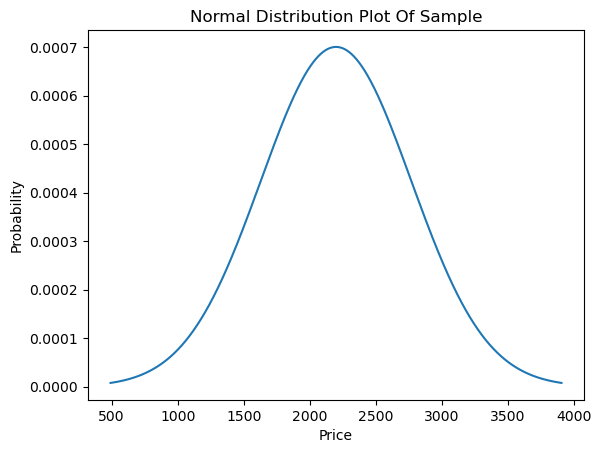

In [38]:
plt.plot(data,norm_prob)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Normal Distribution Plot Of Sample');

5 : Calculate z-scores

In [36]:
df['Zscore']=(df['price']-df['price'].mean())/df['price'].std()
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend,Zscore
0,1,1499,25,80,4,14,no,no,yes,94,1,-1.240654
1,2,1795,33,85,2,14,no,no,yes,94,1,-0.731015
2,3,1595,25,170,4,15,no,no,yes,94,1,-1.075366
3,4,1849,25,170,8,14,no,no,no,94,1,-0.638041
4,5,3295,33,340,16,14,no,no,yes,94,1,1.851612
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35,-0.911799
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35,0.005894
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35,0.747969
6257,6258,2195,100,850,16,15,yes,no,yes,39,35,-0.042315


6 : Calculate probability values of the z-score

In [37]:
df['Probability']=st.norm.pdf(df['Zscore'])
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend,Zscore,Probability
0,1,1499,25,80,4,14,no,no,yes,94,1,-1.240654,0.184787
1,2,1795,33,85,2,14,no,no,yes,94,1,-0.731015,0.305401
2,3,1595,25,170,4,15,no,no,yes,94,1,-1.075366,0.223768
3,4,1849,25,170,8,14,no,no,no,94,1,-0.638041,0.325469
4,5,3295,33,340,16,14,no,no,yes,94,1,1.851612,0.071850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35,-0.911799,0.263256
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35,0.005894,0.398935
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35,0.747969,0.301596
6257,6258,2195,100,850,16,15,yes,no,yes,39,35,-0.042315,0.398585


7 : Draw the standard normal probability distribution curve

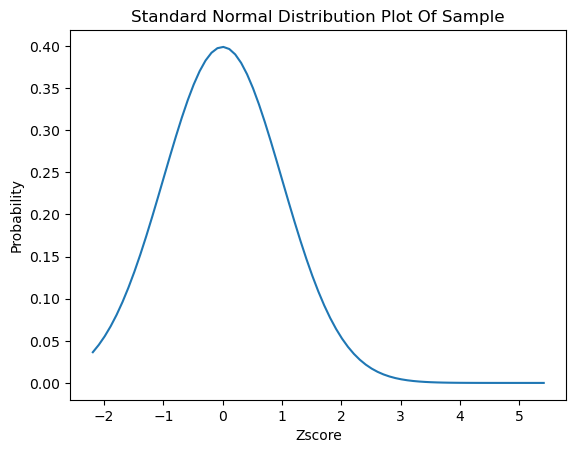

In [39]:
d=np.arange(df['Zscore'].min(),df['Zscore'].max(),0.1)
p=st.norm.pdf(d)
plt.plot(d,p)
plt.xlabel('Zscore')
plt.ylabel('Probability')
plt.title('Standard Normal Distribution Plot Of Sample');

8 : Find the probability of the occurrence of the prices greater than $2,700

In [40]:
mean=df['price'].mean()
std=df['price'].mean()
x=2700
z=(x-mean)/std
p=1-st.norm.cdf(z)
print('Probability of the occurrence of the prices greater than $2,700 : ',p)

Probability of the occurrence of the prices greater than $2,700 :  0.41431919423709784


9 : Find the probability of the occurrence of the prices less than $1,301

In [41]:
x=1301
z=(x-mean)/std
p=st.norm.cdf(z)
print('Probability of the occurrence of the prices less than $1,301 : ',p)

Probability of the occurrence of the prices less than $1,301 :  0.3394911849311998


10 :  Find the probability of the occurrence of the prices between $2,000 and $2,900

In [42]:
x1=2000
z1=(x1-mean)/std

x2=2900
z2=(x2-mean)/std
p=st.norm.cdf(z2)-st.norm.cdf(z1)
print('Probability of the occurrence of the prices between $2,000 and $2,900 : ',p)

Probability of the occurrence of the prices between $2,000 and $2,900 :  0.15981111419355115
